 <h2> Loading the necessary libraries <h2> 

In [230]:
import pandas as py# type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd# type: ignore
from sklearn.model_selection import train_test_split# type: ignore
from sklearn.linear_model import LinearRegression# type: ignore
from sklearn.metrics import mean_squared_error# type: ignore
from sklearn.model_selection import train_test_split# type: ignore
import statsmodels.api as sm# type: ignore
import numpy as np



<h3> Load the dataset <h3>

In [231]:
df = pd.read_csv('amazon_2023_2024.csv')
print(df['Close'])

0      102.050003
1      103.629997
2      103.650002
3      104.000000
4      105.660004
          ...    
248    173.669998
249    179.619995
250    180.960007
251    175.000000
252    179.000000
Name: Close, Length: 253, dtype: float64


<h3> Decreasing the variance on the dataset with moving averages <h3>

In [232]:

df['SMA_7'] = df['Close'].rolling(window=7).mean()
df['SMA_7_volume'] = df['Volume'].rolling(window=16).mean()
df['SMA_7_open'] = df['Open'].rolling(window=7).mean()
df['SMA_7_low'] = df['Low'].rolling(window=7).mean()
df['SMA_7_high'] = df['High'].rolling(window=7).mean()
print(df['Close'])

0      102.050003
1      103.629997
2      103.650002
3      104.000000
4      105.660004
          ...    
248    173.669998
249    179.619995
250    180.960007
251    175.000000
252    179.000000
Name: Close, Length: 253, dtype: float64


<h3> Plotting the dataset <h3>

Text(0, 0.5, 'high')

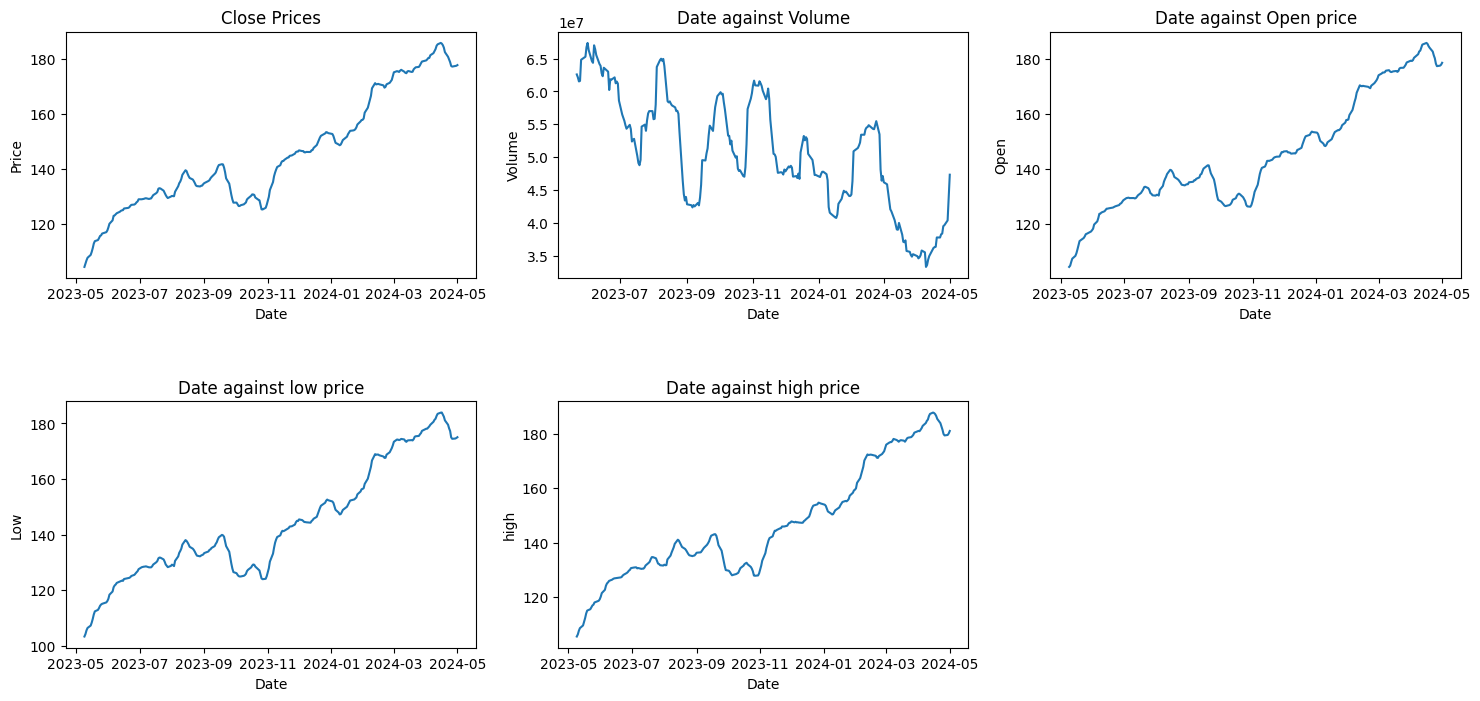

In [233]:
df['Date'] = py.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)

# Initialize one large figure to hold all subplots
plt.figure(figsize=(18, 8))  # Adjust overall figure size
plt.subplots_adjust(hspace=0.5) 



plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7'])
plt.title('Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')



plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_volume'])
plt.title('Date against Volume')
plt.xlabel('Date')
plt.ylabel('Volume')



plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_open'])
plt.title('Date against Open price')
plt.xlabel('Date')
plt.ylabel('Open')


plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_low'])
plt.title('Date against low price')
plt.xlabel('Date')
plt.ylabel('Low')




plt.subplot(2, 3, 5)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_high'])
plt.title('Date against high price')
plt.xlabel('Date')
plt.ylabel('high')




<h3> Split into test and train datasets <h3>

In [234]:
split_percentage = 0.80
split_index = int(len(df) * split_percentage)
df_train = df.iloc[:split_index]
df_test =  df.iloc[split_index:]


<h3> ACF AND PACF PLOT <h3>

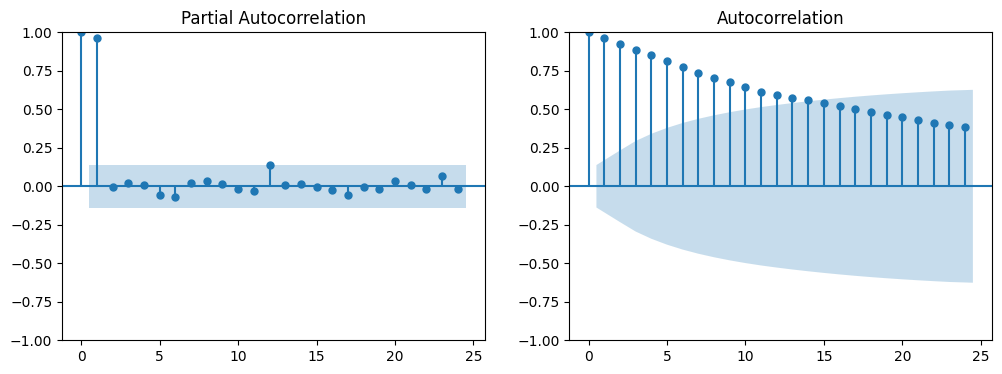

                 Close
Date                  
2023-05-01  102.050003
2023-05-02  103.629997
2023-05-03  103.650002
2023-05-04  104.000000
2023-05-05  105.660004
...                ...
2024-02-12  172.339996
2024-02-13  168.639999
2024-02-14  170.979996
2024-02-15  169.800003
2024-02-16  169.509995

[202 rows x 1 columns]


In [235]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
df_train = df_train[[ 'Close']]
df_test = df_test[[ 'Close']]
df_train.index = pd.DatetimeIndex(df_train.index).to_period('D')
df_test.index = pd.DatetimeIndex(df_test.index).to_period('D')
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 2, 1) 
plot_pacf(df_train, ax=plt.gca())  
plt.subplot(1, 2, 2) 
plot_acf(df_train, ax=plt.gca())  
plt.show()  #
print(df_train)

<h3> Make it stationary <h3>

<Axes: xlabel='Date'>

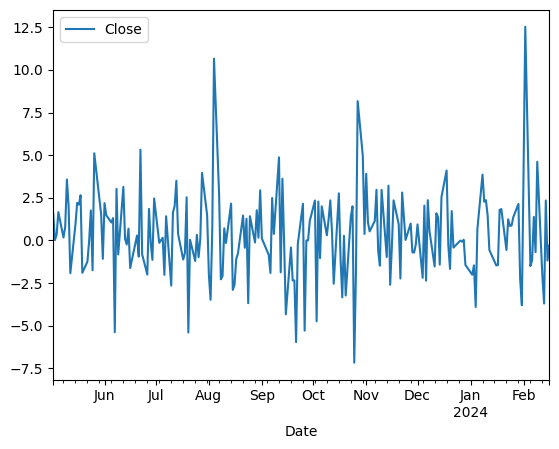

In [236]:
df_train_stationary =  df_train.diff().dropna()
df_train_stationary.plot()


<h3> Plotting  the  Auto and Partial Correlation functions after making the dataset stationary <h3>

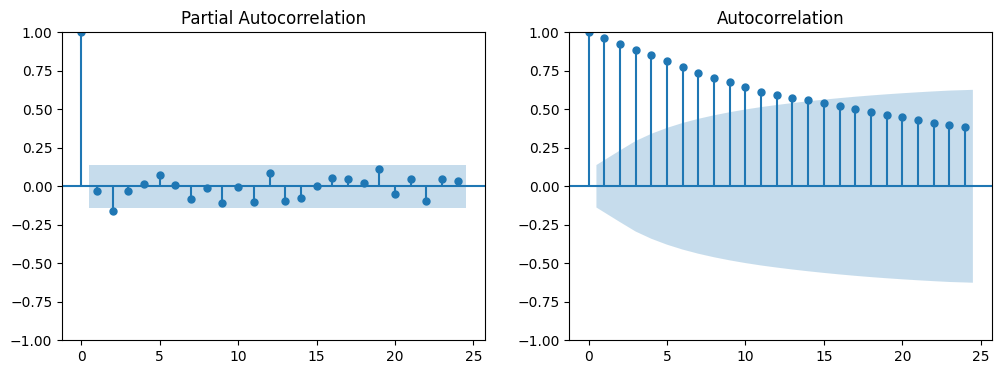

In [237]:
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 2, 1) 
plot_pacf(df_train_stationary, ax=plt.gca())  
plt.subplot(1, 2, 2) 
plot_acf(df_train, ax=plt.gca())  
plt.show()  #

In [238]:

#The pacf and acf plots proves that time series was succesfully transformed into stationary  time series 
#with first-order differencing so we determined the d value for our Arima model.


<h2 style='font_family :'Sans' > Using the Arima model <h2>

In [239]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train['Close'],stepwise=False,seasonal=False)
auto_arima

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

In [240]:
# trying to find optimal parameters  automatically failed

<h3> Fitting the model <h3>

In [241]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA (df_train['Close'],order = (1,2,2))
model_fit =  model.fit()


<h3> Plotting the residual graph <h3>

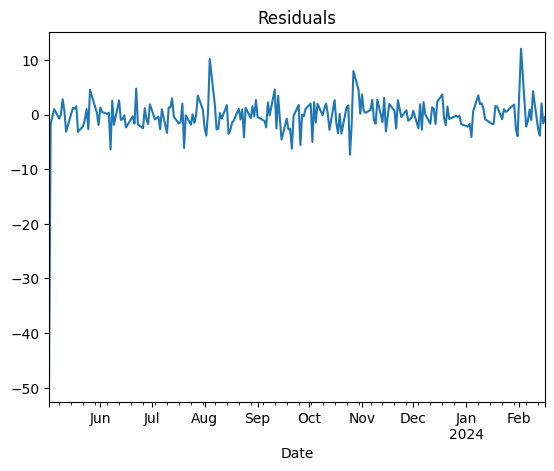

In [242]:
residuals =  model_fit.resid[1:]
residuals.plot(title='Residuals')
plt.show()



<h3> Plotting the  predicted vs actual  closing prices <h3>

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-01  104.949997  105.230003  101.820000  102.050003  102.050003   
2023-05-02  101.470001  103.900002  101.150002  103.629997  103.629997   
2023-05-03  103.739998  105.959999  103.279999  103.650002  103.650002   
2023-05-04  104.040001  105.389999  103.309998  104.000000  104.000000   
2023-05-05  104.269997  105.760002  103.550003  105.660004  105.660004   
...                ...         ...         ...         ...         ...   
2024-04-25  169.679993  173.919998  166.320007  173.669998  173.669998   
2024-04-26  177.800003  180.820007  176.130005  179.619995  179.619995   
2024-04-29  182.750000  183.529999  179.389999  180.960007  180.960007   
2024-04-30  181.089996  182.990005  174.800003  175.000000  175.000000   
2024-05-01  181.889999  185.149994  176.559998  179.000000  179.000000   

              Volume       SMA_7  SMA

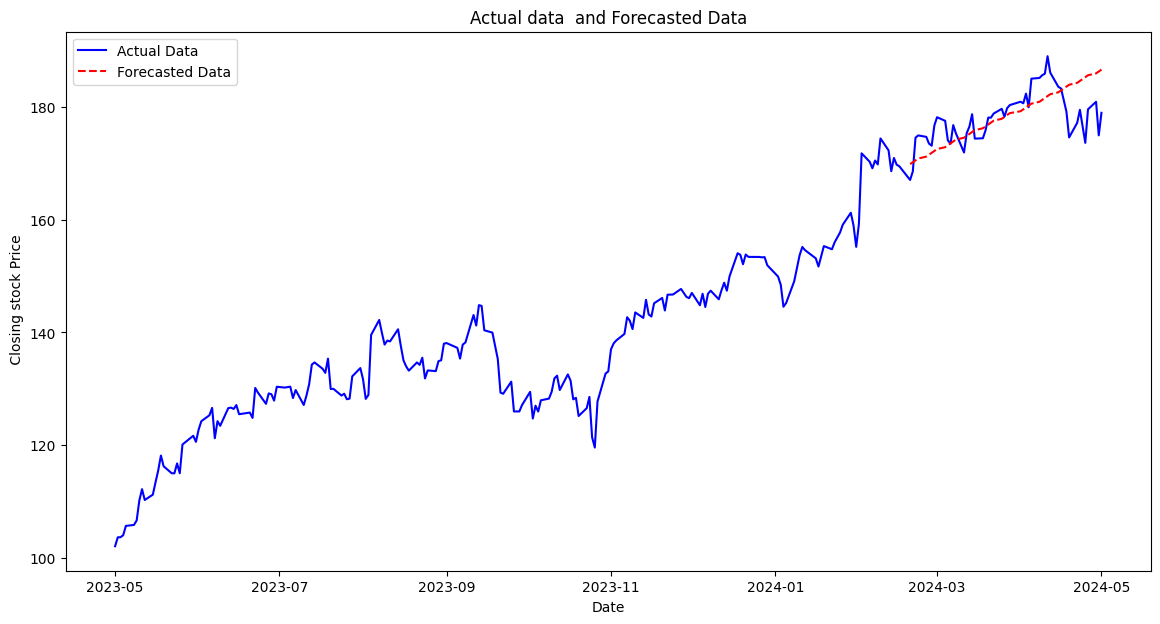

In [243]:
import matplotlib.pyplot as plt
import pandas as pd

# If df_train or df_test has a PeriodIndex, convert to Timestamp
df_train.index = df_train.index.to_timestamp()
df_test.index = df_test.index.to_timestamp()
# Calculate the number of steps for forecasting based on the test set length
num_steps = len(df_test)  # Assuming df_test index is already converted to Timestamp

# Generate forecast from the model
forecast_result = model_fit.get_forecast(steps=num_steps)
forecast_df = forecast_result.summary_frame()

if not forecast_df.index.equals(df_test.index):
    forecast_df.index = df_test.index  # Ensuring alignment with df_test dates

# Reindex the main DataFrame to accommodate forecast dates and insert the forecast data
# df should contain your training data
df.loc[forecast_df.index, 'forecast_manual'] = forecast_df['mean']
print(df)
# Plotting the training data and forecast data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Data', color='blue')  # Ensure df_train has a 'Close' column
plt.plot(df.index, df['forecast_manual'], label='Forecasted Data', color='red', linestyle='--')
plt.title('Actual data  and Forecasted Data')
plt.xlabel('Date')
plt.ylabel(' Closing stock Price')
plt.legend()
plt.show()
